In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm

In [2]:
def parse_log(file_path, idx=1):
    # Initialize variables
    loss_arrays = []
    current_arrays = []
    current_array = []

    # Define the regex pattern
    pattern = re.compile(r"loss=([\d.]+),")

    # Read the log file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Parse the log file
    for line in tqdm(lines):
        match = pattern.search(line)
        if match:
            loss_value = float(match.group(1))
            
            if len(current_arrays) >= 5:
                min_length = min(arr.shape[0] for arr in current_arrays)
                current_arrays_truncated = [arr[-min_length:] for arr in current_arrays]
                loss_arrays.append(np.vstack(current_arrays_truncated))
                print(idx, end=" ")
                idx += 1
                current_arrays = []
                current_array = []
            elif loss_value > 0:
                current_array.append(loss_value)
            elif len(current_array) > 0:
                current_arrays.append(np.array(current_array))
                current_array = []

    # Check if the last array has the required shape
    if len(current_arrays) == 5:
        loss_arrays.append(np.array(current_arrays))
        
    return loss_arrays

parsed_data = []
for log_id in ["0a", "0b", "0c", "0d", "0e", "1a", "1b", "1c"]:
    file_path = f'data/losses/out{log_id}.log'
    parsed_data += parse_log(file_path, idx=1)
len(parsed_data)

  0%|          | 0/2113795 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 

  0%|          | 0/682651 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

  0%|          | 0/2207581 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 

  0%|          | 0/202967 [00:00<?, ?it/s]

1 2 3 4 5 6 7 

  0%|          | 0/1981512 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 

  0%|          | 0/2135807 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 

  0%|          | 0/1895127 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 

  0%|          | 0/3358370 [00:00<?, ?it/s]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 

503

In [5]:
mean_arrays = [np.mean(array, axis=0) for array in parsed_data]
mean_arrays

[array([11.326, 11.326, 11.326, ...,  1.922,  1.922,  1.922]),
 array([2.962, 2.962, 2.962, ..., 2.96 , 2.96 , 2.96 ]),
 array([4.572, 4.572, 4.564, ..., 1.476, 1.476, 1.476]),
 array([5.904 , 5.904 , 5.894 , ..., 0.1824, 0.1824, 0.1824]),
 array([5.912, 5.912, 5.742, ..., 2.026, 2.026, 2.026]),
 array([3.81  , 3.81  , 3.808 , ..., 0.6478, 0.6478, 0.6478]),
 array([6.412, 6.412, 6.396, ..., 2.696, 2.696, 2.696]),
 array([5.594, 5.594, 5.594, ..., 5.042, 5.042, 5.042]),
 array([5.182, 5.182, 5.182, ..., 2.416, 2.416, 2.416]),
 array([6.046, 6.046, 6.046, ..., 5.952, 5.952, 5.952]),
 array([6.382, 6.382, 6.382, ..., 3.872, 3.872, 3.872]),
 array([7.352, 7.352, 7.352, ..., 7.022, 7.022, 7.022]),
 array([6.472, 6.472, 6.472, ..., 5.696, 5.696, 5.696]),
 array([4.81 , 4.81 , 4.81 , ..., 4.312, 4.312, 4.312]),
 array([7.048, 7.048, 7.048, ..., 6.862, 6.862, 6.862]),
 array([6.282 , 6.282 , 6.282 , ..., 0.9214, 0.9214, 0.9214]),
 array([4.942, 4.942, 4.942, ..., 4.58 , 4.58 , 4.58 ]),
 array(

In [10]:
x_max = 5000
x_common = np.linspace(0, x_max, num=len(mean_arrays[0]))
x_max, x_common

(5000,
 array([0.00000000e+00, 2.67094017e+00, 5.34188034e+00, ...,
        4.99465812e+03, 4.99732906e+03, 5.00000000e+03]))

In [12]:
interpolated_arrays = [np.interp(x_common, np.arange(len(mean_array)), mean_array) for mean_array in mean_arrays]
interpolated_arrays

KeyboardInterrupt: 

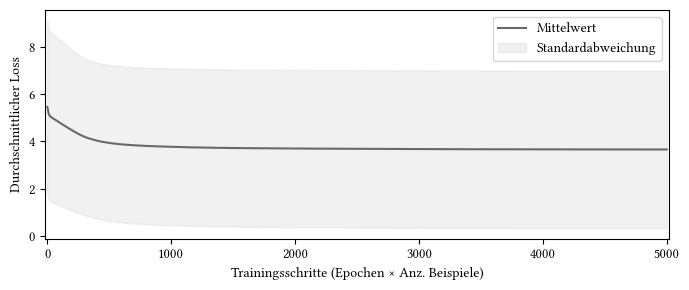

In [61]:
mean_curve = np.mean(interpolated_arrays, axis=0)
std_curve = np.std(interpolated_arrays, axis=0)

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(7, 3))

# Plot the mean curve
plt.plot(x_common, mean_curve, label='Mittelwert', color='dimgrey')

# Add shaded region for the standard deviation
plt.fill_between(x_common, mean_curve - std_curve, mean_curve + std_curve, alpha=0.3, color='lightgrey', label='Standardabweichung')

plt.xlim(-20, x_max+20)
plt.xlabel('Trainingsschritte (Epochen × Anz. Beispiele)')
plt.ylabel('Durchschnittlicher Loss')
plt.legend()
plt.tight_layout()
plt.savefig('loss_mbart.pdf')
plt.show()